### MACHINE LEARNING 
### NAME: KSHITIJ CHILATE
### DATE: 27/12/25

### In the current automotive market, both buyers and sellers face challenges in determining the fair market value of used cars.
### 1.Perform EDA
### 2.Apply linear regression
### 3.Apply multiple linear regression
### 4.Evaluate the performance using
### 5.Apply hyper parameter

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd                       #handle tablular data
import matplotlib.pyplot as plt
import seaborn as sns                     #visulisation
import warnings
import kagglehub

In [ ]:
scaler= MinMaxScaler()
data = pd.read_csv("car data.csv")
data["Driven_kms_Normalized"] = scaler.fit_transform(data[["Driven_kms"]])
print(data)


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  Driven_kms_Normalized  
0         Dealer       Manual      0             

In [ ]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_kms_Normalized
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.053053
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.085085
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.012813
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.009409
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.083984
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.003145
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,0.036629
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,0.065924
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.039586
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,0.083818


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               301 non-null    object 
 1   Year                   301 non-null    int64  
 2   Selling_Price          301 non-null    float64
 3   Present_Price          301 non-null    float64
 4   Driven_kms             301 non-null    int64  
 5   Fuel_Type              301 non-null    object 
 6   Selling_type           301 non-null    object 
 7   Transmission           301 non-null    object 
 8   Owner                  301 non-null    int64  
 9   Driven_kms_Normalized  301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Driven_kms_Normalized
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.072967
std,2.891554,5.082812,8.642584,38886.883882,0.247915,0.077852
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.029029
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.063063
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.096631
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000


In [ ]:
data.shape

(301, 10)

In [ ]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0
Driven_kms_Normalized,0


In [ ]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_kms_Normalized
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0,0.085085
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,0.079079


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

(299, 10)

In [ ]:
median = data["Selling_Price"].median()
print(median)
data["Selling_Price"] = data["Selling_Price"].fillna(median)

3.51


<Axes: >

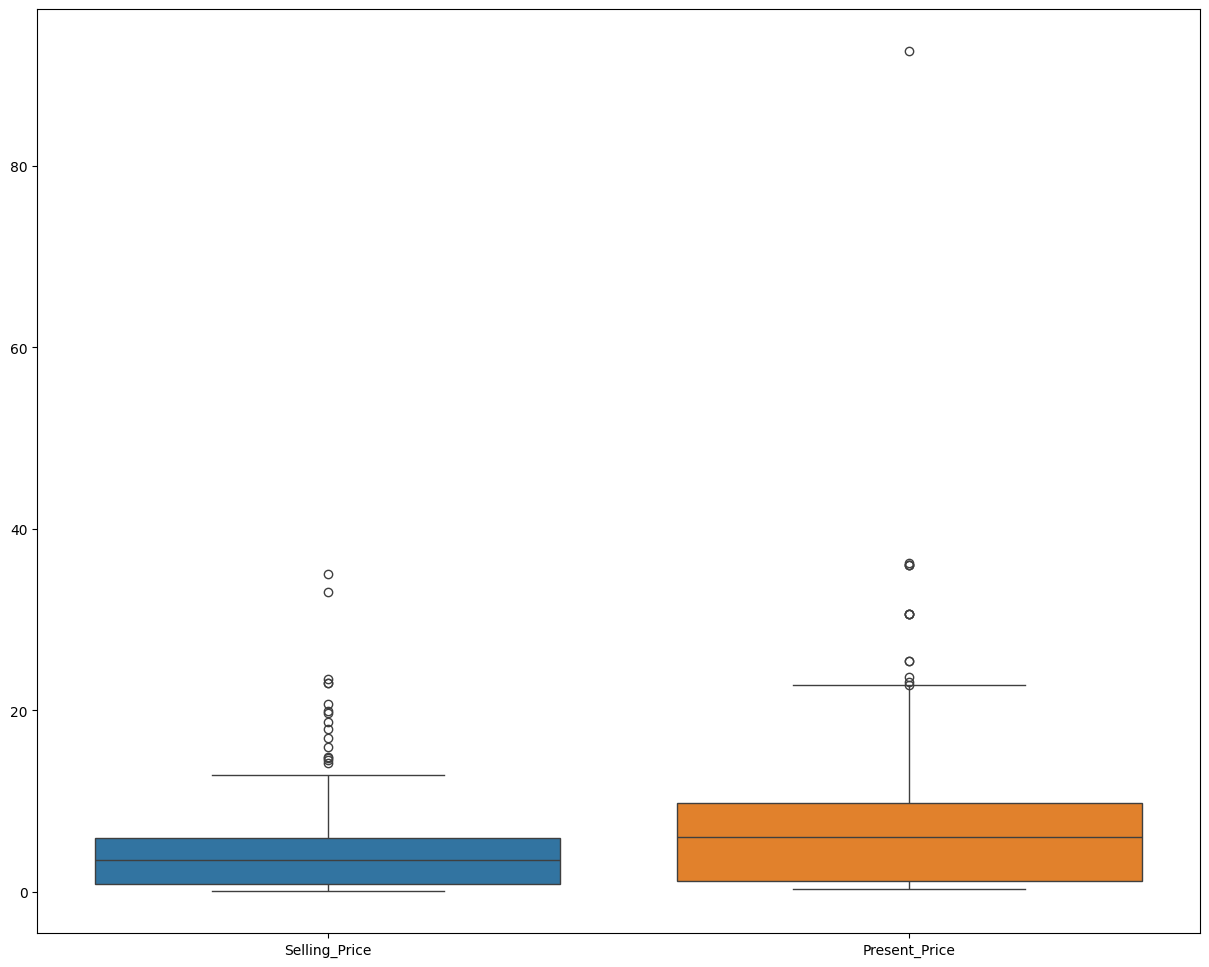

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=data[["Selling_Price", "Present_Price"]])

In [ ]:
def detect_outliers_iqr(data):
  outlier_list = []
  data = sorted(data)

  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)

  IQR = q3 - q1

  lwr_bound = q1 - (1.5 * IQR)
  upr_bound = q3 + (1.5 * IQR)

  for i in data:
    if i < lwr_bound or i > upr_bound:
      outlier_list.append(i)

  return outlier_list

In [ ]:
for i in ["Selling_Price", "Present_Price","Driven_kms","Owner"]:
  outliers = detect_outliers_iqr(data[i])
  print("Outliers in", i, "attribute:", outliers)

Outliers in Selling_Price attribute: [14.25, 14.5, 14.73, 14.9, 16.0, 17.0, 18.0, 18.75, 19.75, 19.99, 20.75, 23.0, 23.0, 23.5, 33.0, 35.0]
Outliers in Present_Price attribute: [22.83, 23.15, 23.73, 25.39, 25.39, 30.61, 30.61, 30.61, 30.61, 35.96, 35.96, 35.96, 36.23, 92.6]
Outliers in Driven_kms attribute: [104707, 127000, 135000, 135154, 142000, 197176, 213000, 500000]
Outliers in Owner attribute: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3]


In [ ]:
from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
# Scaling: Fixing values between a range to minimize "confusion" for early/weak algos
data["Driven_kms_Normalized"] = scaler.fit_transform(data[["Driven_kms"]])
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
294     city  2016           9.50          11.60       33988    Diesel   
295     brio  2015           4.00           5.90       60000    Petrol   
296     city  2009           3.35          11.00       87934    Petrol   
297     city  2017          11.50          12.50        9000    Diesel   
298     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  Driven_kms_Normalized  
0         Dealer       Manual      0             

In [ ]:
data.drop(columns=["Car_Name"], inplace=True)

In [ ]:
data["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
data["Fuel_Type"] = data["Fuel_Type"].replace("Petrol", 0)
data["Fuel_Type"] = data["Fuel_Type"].replace("Diesel", 1)
data["Fuel_Type"] = data["Fuel_Type"].replace("CNG", 2)

/tmp/ipython-input-1660612881.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Fuel_Type"] = data["Fuel_Type"].replace("CNG", 2)


In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_kms_Normalized
0,2014,3.35,5.59,27000,0,Dealer,Manual,0,0.053053
1,2013,4.75,9.54,43000,1,Dealer,Manual,0,0.085085
2,2017,7.25,9.85,6900,0,Dealer,Manual,0,0.012813
3,2011,2.85,4.15,5200,0,Dealer,Manual,0,0.009409
4,2014,4.60,6.87,42450,1,Dealer,Manual,0,0.083984


In [ ]:
data["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
data["Transmission"] = data["Transmission"].replace("Manual", 0)
data["Transmission"] = data["Transmission"].replace("Automatic", 1)

/tmp/ipython-input-4017930943.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Transmission"] = data["Transmission"].replace("Automatic", 1)


In [ ]:
data["Selling_type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
data["Selling_type"] = data["Selling_type"].replace("Dealer", 0)
data["Selling_type"] = data["Selling_type"].replace("Individual", 1)

/tmp/ipython-input-3970622914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Selling_type"] = data["Selling_type"].replace("Individual", 1)


In [ ]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_kms_Normalized
0,2014,3.35,5.59,27000,0,0,0,0,0.053053
1,2013,4.75,9.54,43000,1,0,0,0,0.085085
2,2017,7.25,9.85,6900,0,0,0,0,0.012813
3,2011,2.85,4.15,5200,0,0,0,0,0.009409
4,2014,4.60,6.87,42450,1,0,0,0,0.083984


In [ ]:
from datetime import date

data['Car_Age'] = 2018 - data['Year']

display(data.head())

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Driven_kms_Normalized,Car_Age
0,2014,3.35,5.59,27000,0,0,0,0,0.053053,4
1,2013,4.75,9.54,43000,1,0,0,0,0.085085,5
2,2017,7.25,9.85,6900,0,0,0,0,0.012813,1
3,2011,2.85,4.15,5200,0,0,0,0,0.009409,7
4,2014,4.60,6.87,42450,1,0,0,0,0.083984,4


In [ ]:
for i in ["Car_Age"]:
  outliers = detect_outliers_iqr(data[i])
  print("Outliers in", i, "attribute:", outliers)

Outliers in Car_Age attribute: [13, 13, 13, 13, 14, 15, 15]


In [ ]:
data.drop(columns=["Year"], inplace=True)

<Axes: >

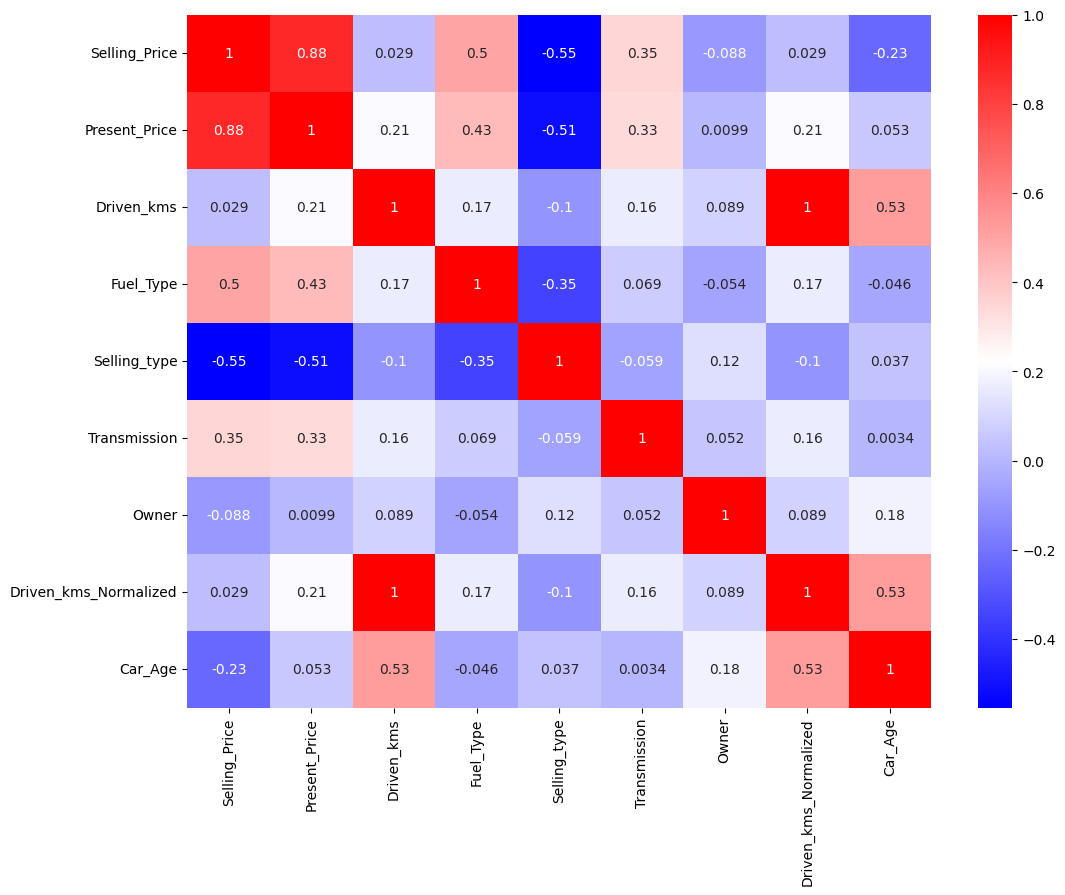

In [ ]:
numeric_cols=data.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,9))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="bwr")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['Present_Price'],axis=1)
y = data['Selling_Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_, model.intercept_)

[ 1.00000000e+00 -1.44159258e-18 -1.23542784e-16 -2.09031955e-16
 -7.39867045e-17  2.24594324e-17 -2.88607107e-24  6.04730806e-17] 4.973799150320701e-14


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",mae)
mse = mean_squared_error(y_test,y_pred)
print("Mean Square Error :",mse)
r2_score = r2_score(y_test,y_pred)
print("R Squared Error :",r2_score)

Mean Absolute Error : 3.590630879044296e-14
Mean Square Error : 6.478680466437298e-27
R Squared Error : 1.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[["Present_Price", "Fuel_Type", "Transmission", "Driven_kms_Normalized", "Car_Age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
multivariate_reg = LinearRegression()
multivariate_reg.fit(X_train, y_train)

y_pred = multivariate_reg.predict(X_test)

In [ ]:
print(multivariate_reg.coef_, multivariate_reg.intercept_)

[ 0.46491838  1.31070386  1.79509567 -3.35696662 -0.35075752] 2.3919867883422965


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

print(f"R-Squared: {multivariate_reg.score(X_train, y_train)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMS: {root_mean_squared_error(y_test, y_pred)}")

R-Squared: 0.8950367153879526
MSE: 4.8949740552260295
MAE: 1.425685861501668
RMS: 2.212458825656656
